<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-анализ-таблиц" data-toc-modified-id="Загрузка-и-анализ-таблиц-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и анализ таблиц</a></span><ul class="toc-item"><li><span><a href="#Таблица-contract" data-toc-modified-id="Таблица-contract-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Таблица <code>contract</code></a></span></li><li><span><a href="#Таблица-internet" data-toc-modified-id="Таблица-internet-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Таблица <code>internet</code></a></span></li><li><span><a href="#Таблица-personal" data-toc-modified-id="Таблица-personal-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Таблица <code>personal</code></a></span></li><li><span><a href="#Таблица-phone" data-toc-modified-id="Таблица-phone-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Таблица <code>phone</code></a></span></li></ul></li><li><span><a href="#Объединение-таблиц" data-toc-modified-id="Объединение-таблиц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Объединение таблиц</a></span></li><li><span><a href="#Исследовательский-анализ" data-toc-modified-id="Исследовательский-анализ-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ</a></span><ul class="toc-item"><li><span><a href="#Распределения-количественных-признаков" data-toc-modified-id="Распределения-количественных-признаков-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Распределения количественных признаков</a></span></li><li><span><a href="#Мультиколлинеарность-признаков" data-toc-modified-id="Мультиколлинеарность-признаков-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Мультиколлинеарность признаков</a></span></li></ul></li><li><span><a href="#Подготовка-данных-у-обучению-моделей" data-toc-modified-id="Подготовка-данных-у-обучению-моделей-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Подготовка данных у обучению моделей</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#LGBMClassifier" data-toc-modified-id="LGBMClassifier-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>LGBMClassifier</a></span></li></ul></li><li><span><a href="#Тест-лучшей-модели" data-toc-modified-id="Тест-лучшей-модели-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Тест лучшей модели</a></span><ul class="toc-item"><li><span><a href="#AUC-ROC-на-тестовой-выборке" data-toc-modified-id="AUC-ROC-на-тестовой-выборке-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>AUC-ROC на тестовой выборке</a></span></li><li><span><a href="#Accuracy-на-тестовой-выборке" data-toc-modified-id="Accuracy-на-тестовой-выборке-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Accuracy на тестовой выборке</a></span></li><li><span><a href="#График-AUC-ROC" data-toc-modified-id="График-AUC-ROC-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>График AUC-ROC</a></span></li><li><span><a href="#Анализ-важности-признаков" data-toc-modified-id="Анализ-важности-признаков-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Анализ важности признаков</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></div>

# Прогнозирование оттока клиентов оператора связи

## Загрузка и анализ таблиц

In [3]:
import pandas as pd
import phik
from phik.report import plot_correlation_matrix
from phik import report
from sklearn.model_selection import train_test_split, GridSearchCV
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from warnings import filterwarnings
warnings.filterwarnings('ignore')

try:
    df_contract = pd.read_csv('final_provider/contract.csv')
    df_internet = pd.read_csv('final_provider/internet.csv')
    df_personal = pd.read_csv('final_provider/personal.csv')
    df_phone    = pd.read_csv('final_provider/phone.csv')
except:
    df_contract = pd.read_csv('/datasets/final_provider/contract.csv')
    df_internet = pd.read_csv('/datasets/final_provider/internet.csv')
    df_personal = pd.read_csv('/datasets/final_provider/personal.csv')
    df_phone    = pd.read_csv('/datasets/final_provider/phone.csv')

### Таблица `contract`

In [2]:
df_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [3]:
df_contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


In [4]:
print('Количество дубликатов', df_contract.duplicated().sum())

Количество дубликатов 0


Количество пропущенных значений

In [5]:
df_contract.isna().sum()

customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

Приведем тип столбца `BeginDate` к DateTime

In [6]:
df_contract['BeginDate'] = pd.to_datetime(df_contract['BeginDate'])

Необходимо привести столбец `TotalCharges` к типу `float`. Методом проб и ошибок выяснилось, что в столбце встречаются пробелы:

In [7]:
df_contract[df_contract['TotalCharges'] == " "]

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,


Видно, что это 11 пользователей, которые подключились в день создания таблицы 1 февраля 2020. Полагаю, что для этих пользователей можно заполнить значения `TotalCharges` значениями из `MonthlyCharges`

In [8]:
df_contract.loc[df_contract['TotalCharges'] == " ", 'TotalCharges'] = df_contract['MonthlyCharges']

Теперь можно приводить к `float`

In [9]:
df_contract['TotalCharges'] = df_contract['TotalCharges'].astype(float)

### Таблица `internet`

In [10]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [11]:
df_internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [12]:
print('Количество дубликатов', df_internet.duplicated().sum())

Количество дубликатов 0


Количество пропущенных значений

In [13]:
df_internet.isna().sum()

customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

### Таблица `personal`

In [14]:
df_personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [15]:
df_personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [16]:
print('Количество дубликатов', df_personal.duplicated().sum())

Количество дубликатов 0


Количество пропущенных значений

In [17]:
df_personal.isna().sum()

customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64

### Таблица `phone`

In [18]:
df_phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [19]:
df_phone.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [20]:
print('Количество дубликатов', df_phone.duplicated().sum())

Количество дубликатов 0


Количество пропущенных значений

In [21]:
df_phone.isna().sum()

customerID       0
MultipleLines    0
dtype: int64

## Объединение таблиц

Объединим 4 таблицы в одну по общему столбцу `customerID`

In [22]:
df_summ = df_personal.merge(df_contract, how='left', on='customerID')

In [23]:
df_summ = df_summ.merge(df_internet, how='left', on='customerID')

In [24]:
df_summ = df_summ.merge(df_phone, how='left', on='customerID')

Создадим столбец с целевым признаком `left`

In [25]:
df_summ['left'] = df_summ['EndDate'].apply(lambda x: 0 if x == 'No' else 1)

В столбце `EndDate` для значений `No` поставим дату выгрузки 2020-02-01

In [26]:
df_summ['EndDate'] = df_summ['EndDate'].apply(lambda x: '2020-02-01' if x == 'No' else x)

И приведем к DateTime

In [27]:
df_summ['EndDate'] = pd.to_datetime(df_summ['EndDate'])

Создадим столбец `duration` c длительностью контракта пользователя

In [28]:
df_summ['duration'] = df_summ['EndDate'] - df_summ['BeginDate']

Теперь удалим столбцы `BeginDate` и `EndDate`, а также `customerID`

In [29]:
df_summ.drop(['BeginDate', 'EndDate', 'customerID'], axis=1, inplace=True)

Преобразуем столбец `duration`

In [30]:
df_summ['duration'] = df_summ['duration'].dt.days

После объединения в итоговой таблице образовалось много ячеек с неопределенными значениями. Заполним их.

In [31]:
df_summ.fillna('No', inplace=True)

## Исследовательский анализ

### Распределения количественных признаков

Ежемесячные платежи `MonthlyCharges`

In [32]:
df_summ['MonthlyCharges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

<AxesSubplot:>

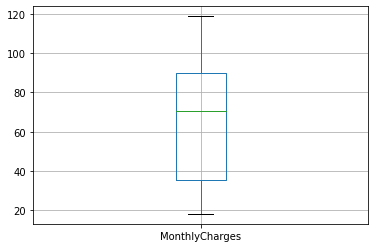

In [33]:
df_summ.boxplot('MonthlyCharges', figsize=(5,5))

Аномальных выбросов не видно.

<AxesSubplot:>

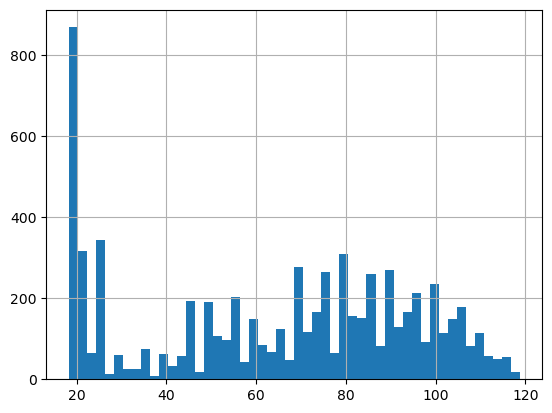

In [34]:
df_summ['MonthlyCharges'].hist(bins=50)

Самый дешевый тариф является самым популярным

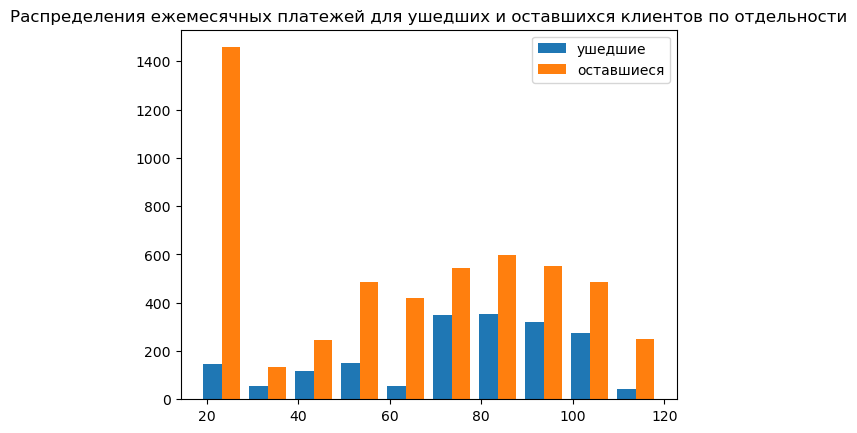

In [35]:
lefts   = df_summ.query('left == 1')['MonthlyCharges']
stays = df_summ.query('left == 0')['MonthlyCharges']

plt.hist([lefts, stays], bins=10, label=['ушедшие', 'оставшиеся'])
plt.title('Распределения ежемесячных платежей для ушедших и оставшихся клиентов по отдельности')
plt.legend(loc='upper right')
plt.show()

Как видно, среди лояльных клиентов особенно много тех, что выбирают дешевый тариф без дополнений

Общие платежи платежи `TotalCharges`

In [36]:
df_summ['TotalCharges'].describe()

count    7043.000000
mean     2279.798992
std      2266.730170
min        18.800000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

<AxesSubplot:>

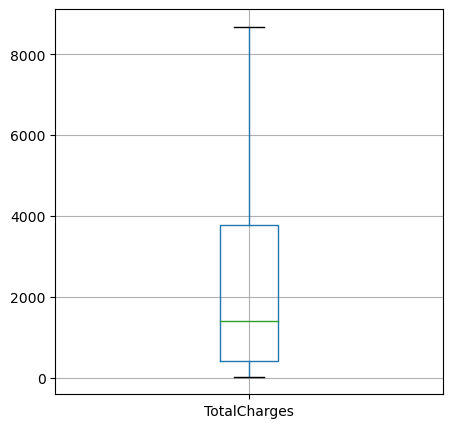

In [37]:
df_summ.boxplot('TotalCharges', figsize=(5,5))

Аномальных выбросов не видно.

<AxesSubplot:>

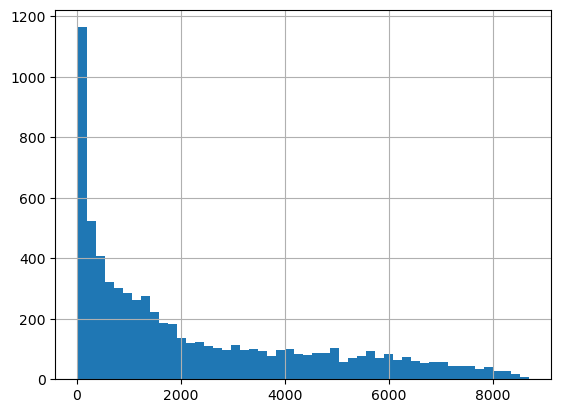

In [38]:
df_summ['TotalCharges'].hist(bins=50)

Похоже, что пик в начале графика образовался благодаря пользователям, которые пользовались услугами короткое время.

Длительность контракта `duration`

In [39]:
df_summ['duration'].describe()

count    7043.000000
mean      985.996166
std       747.587844
min         0.000000
25%       273.000000
50%       883.000000
75%      1676.000000
max      2191.000000
Name: duration, dtype: float64

<AxesSubplot:>

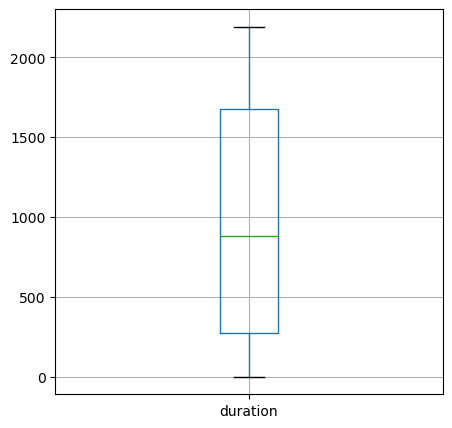

In [40]:
df_summ.boxplot('duration', figsize=(5,5))

Аномальных выбросов не видно.

<AxesSubplot:>

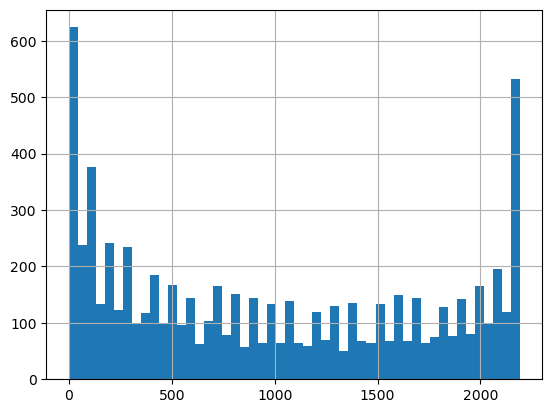

In [41]:
df_summ['duration'].hist(bins=50)

### Мультиколлинеарность признаков
Иссследуем датасет на мультиколлинеарность признаков

In [42]:
phik_overview = df_summ.phik_matrix().round(2)

interval columns not set, guessing: ['SeniorCitizen', 'MonthlyCharges', 'TotalCharges', 'left', 'duration']


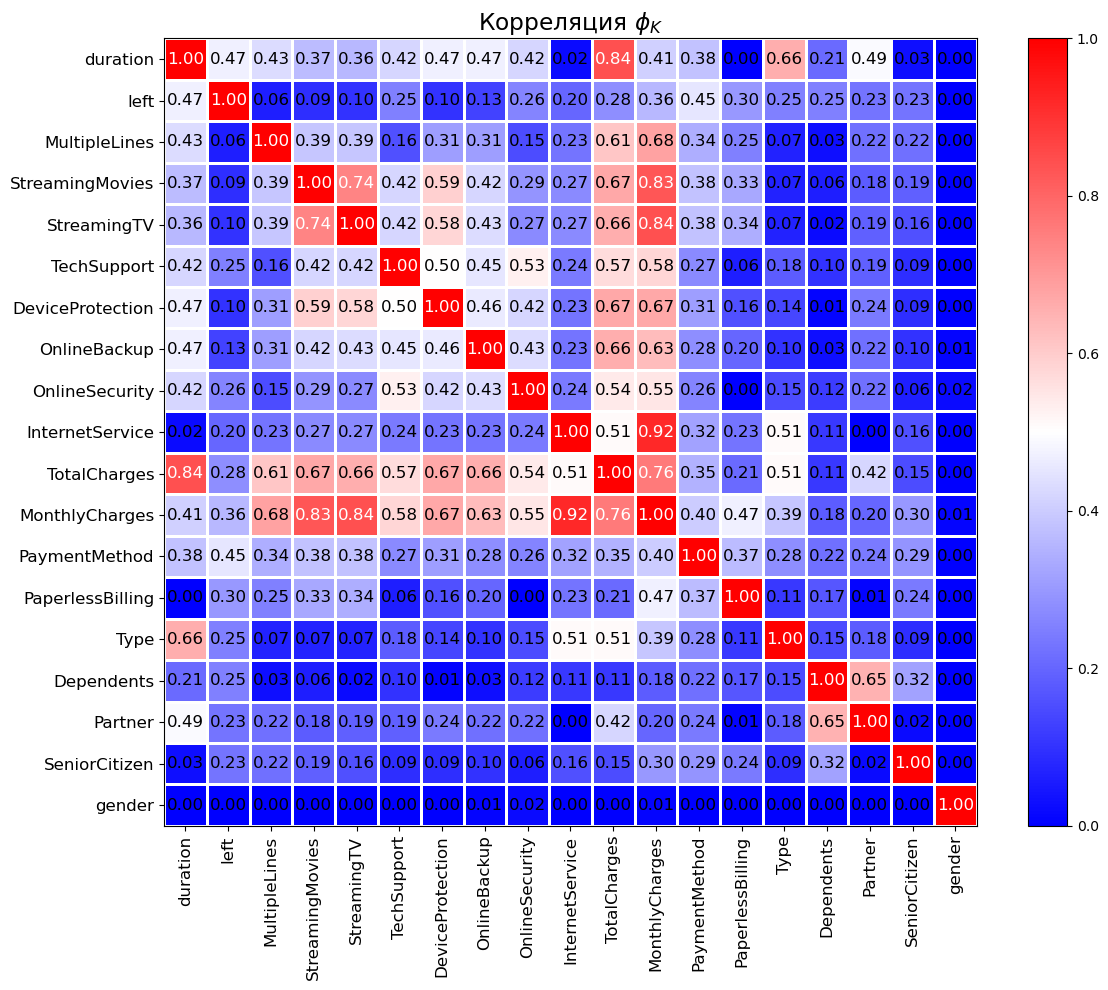

In [43]:

plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="bwr", 
                        title=r"Корреляция $\phi_K$", 
                        fontsize_factor=1.2, 
                        figsize=(12, 10))
plt.tight_layout()

Видно достаточно сильную корреляцию `TotalCharges` с `duration`, а `TotalCharges` c `InternetService`. Можно их убрать как избыточные.

In [44]:
df_summ.drop(['TotalCharges', 'MonthlyCharges'], axis=1, inplace=True)

## Подготовка данных у обучению моделей

Применим one-hot кодирование к категоральным признакам

In [45]:
df_ohe = pd.get_dummies(df_summ, drop_first=True)

Выделим признаки и целевой признак в отдельные датасеты

In [46]:
features = df_ohe.drop('left', axis=1)
target = df_ohe['left']

Разделим данные на обучающую и тестовую выборки в соотношении 60%:20%

In [47]:
features_train, features_test, target_train, target_test = (train_test_split(features, target,
                                                                             test_size=0.20,
                                                                             stratify = target,
                                                                             random_state=290822))

Проверим разбиение

In [48]:
display(features_train.shape[0]/features.shape[0])
display(features_test.shape[0]/features.shape[0])

0.7999432060201619

0.20005679397983814

Баланс классов в обучающей и тестовой выборке

In [49]:
target_train.value_counts(normalize=True)

0    0.734647
1    0.265353
Name: left, dtype: float64

In [50]:
target_test.value_counts(normalize=True)

0    0.734564
1    0.265436
Name: left, dtype: float64

## Обучение моделей

### Логистическая регрессия

In [51]:
log_reg = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=290822)

In [52]:
logreg_params = {}

In [53]:
cv_logreg = GridSearchCV(log_reg, logreg_params, cv = 5, scoring='roc_auc')

In [54]:
%%time
cv_logreg.fit(features_train, target_train)

CPU times: user 72.4 ms, sys: 2.45 ms, total: 74.8 ms
Wall time: 77.5 ms


GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=290822,
                                          solver='liblinear'),
             param_grid={}, scoring='roc_auc')

Лучшая достигнутая метрика AUC-ROC

In [55]:
cv_logreg.best_score_

0.8436685862137823

### Случайный лес

In [56]:
model_rf = RandomForestClassifier(random_state=290822, class_weight='balanced')

In [57]:
rf_params = {'n_estimators': range (50, 500, 50)}

In [58]:
cv_rf = GridSearchCV(model_rf, rf_params, cv = 5, scoring='roc_auc')

In [59]:
%%time
cv_rf.fit(features_train, target_train)

CPU times: user 31.3 s, sys: 222 ms, total: 31.5 s
Wall time: 31.6 s


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=290822),
             param_grid={'n_estimators': range(50, 500, 50)},
             scoring='roc_auc')

Лучшая достигнутая метрика AUC-ROC

In [60]:
cv_rf.best_score_

0.8389437813759445

### LGBMClassifier

In [61]:
model_lgbm = LGBMClassifier(random_state = 290822, class_weight='balanced')

In [62]:
lgbm_params = {'learning_rate': [0.01, 0.05, 0.1],
               'n_estimators': [100, 300, 500],
               'num_leaves': [50, 70, 100, 150]}

In [63]:
cv_lgbm = GridSearchCV(model_lgbm, lgbm_params, cv = 5, scoring='roc_auc')

In [64]:
%%time
cv_lgbm.fit(features_train, target_train)

CPU times: user 11min 1s, sys: 39.2 s, total: 11min 41s
Wall time: 1min 33s


GridSearchCV(cv=5,
             estimator=LGBMClassifier(class_weight='balanced',
                                      random_state=290822),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'n_estimators': [100, 300, 500],
                         'num_leaves': [50, 70, 100, 150]},
             scoring='roc_auc')

Лучшая достигнутая метрика AUC-ROC

In [65]:
cv_lgbm.best_score_

0.9073614523453717

In [66]:
cv_lgbm.best_params_

{'learning_rate': 0.05, 'n_estimators': 500, 'num_leaves': 50}

## Тест лучшей модели

Лучшей моделью является  LGBMClassifier. Протестируем её на тестовой выборке

### AUC-ROC на тестовой выборке

In [67]:
predict_lgbm = cv_lgbm.predict_proba(features_test)[:, 1]

In [68]:
roc_auc_score(target_test, predict_lgbm)

0.9197512206463612

### Accuracy на тестовой выборке

In [69]:
accuracy_score(target_test, cv_lgbm.predict(features_test)) 

0.8566359119943222

### График AUC-ROC

In [70]:
fpr, tpr, thresholds = roc_curve(target_test, predict_lgbm)

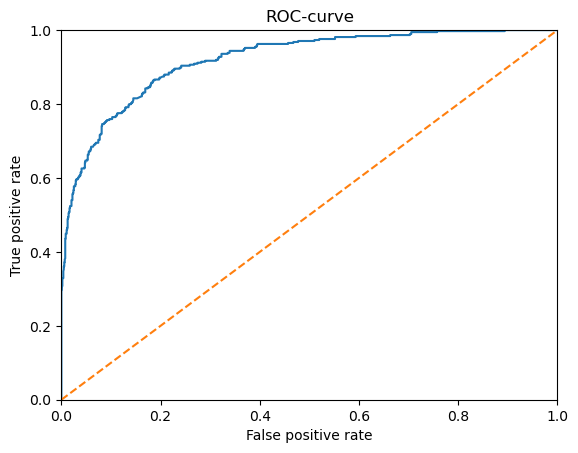

In [71]:
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC-curve')
plt.show()

### Анализ важности признаков

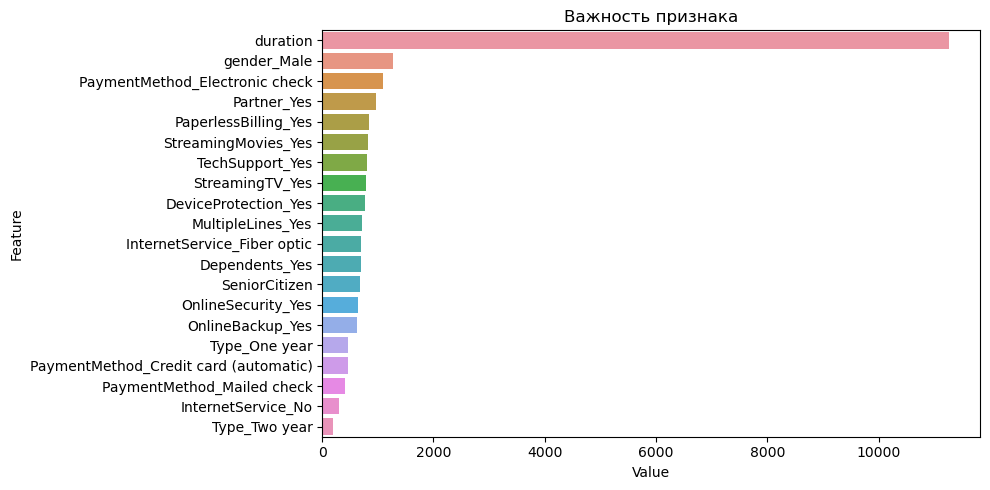

In [72]:
feature_imp = pd.DataFrame(sorted(zip(cv_lgbm.best_estimator_.feature_importances_, features_train.columns)),
                           columns=['Value','Feature'])

plt.figure(figsize=(10, 5))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Важность признака')
plt.tight_layout()
plt.show()

### Вывод

Были обучены 3 модели бинарной классификации для предсказания ухода клиента. Лучшей моделью оказалась LGBMClassifier. Удалось достичь метрики **AUC-ROC = 0.92** на тестовой выборке. Наиболее значимым признаком является время, которое пользователь уже пользуется услугами компании. 